------

# Indonesia Market Analysis

------

## Import Package

In [1]:
import pandas as pd
import calendar
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

------

------

## Prepare Data 

------

------

## Describe 

------

### <i>About data<i>

------

In [2]:
Market = pd.read_csv('sales_detail.csv')

In [3]:
Market.head()

Date                 Receiveno  Hour       Dept   Category  \
0   8-Aug-20  JAK0211.58.20200808.0094    13  CIGARETTE  CIGARETTE   
1  24-Aug-20  JAK0211.58.20200824.0079    11  CIGARETTE  CIGARETTE   
2   6-Sep-20  JAK0211.58.20200906.0031    10  CIGARETTE  CIGARETTE   
3   1-Jun-20  JAK0211.58.20200601.0020    10  CIGARETTE  CIGARETTE   
4   1-Jun-20  JAK0211.58.20200601.0022    10  CIGARETTE  CIGARETTE   

                      Sub Category Type Product  \
0  KRETEK CIGARETTE HANDMADE (SKT)    CIGARETTE   
1  KRETEK CIGARETTE HANDMADE (SKT)    CIGARETTE   
2  KRETEK CIGARETTE HANDMADE (SKT)    CIGARETTE   
3  KRETEK CIGARETTE HANDMADE (SKT)    CIGARETTE   
4  KRETEK CIGARETTE HANDMADE (SKT)    CIGARETTE   

                     Product Name  Qty  Price  Value  
0               DJARUM COKLAT 12S    1  15000  15000  
1               DJARUM COKLAT 12S    1  15000  15000  
2               DJARUM COKLAT 12S    1  15000  15000  
3  DJI SAM SOE MGNM PREM FILT 12S    1  19000  19000  
4  DJI SAM SOE MGNM PREM FILT 12S    1  19000  19000

In [4]:
Market.info()

# Check Numerical
num = Market.select_dtypes(include=['int64'])
# Check Numerical
cat = Market.select_dtypes(include=['object'])

num.columns, cat.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          44693 non-null  object
 1   Receiveno     44693 non-null  object
 2   Hour          44693 non-null  int64 
 3   Dept          44693 non-null  object
 4   Category      44693 non-null  object
 5   Sub Category  44693 non-null  object
 6   Type Product  44693 non-null  object
 7   Product Name  44693 non-null  object
 8   Qty           44693 non-null  int64 
 9   Price         44693 non-null  int64 
 10  Value         44693 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


(Index(['Hour', 'Qty', 'Price', 'Value'], dtype='object'),
 Index(['Date', 'Receiveno', 'Dept', 'Category', 'Sub Category', 'Type Product',
        'Product Name'],
       dtype='object'))

In [5]:
Market.nunique()

Date              121
Receiveno       26083
Hour               19
Dept               18
Category           24
Sub Category       87
Type Product       50
Product Name     1134
Qty                21
Price             169
Value             251
dtype: int64

Unique values in dataset Indonesia Market Analysis

---

**About dataset**

- ***Date:*** Timeseries, showing random timestamp date
- ***Receiveno:*** Number of Transactions ID
- ***Hour:*** desc sales rate time (hour)
- ***Dept:*** Departement or Industries
- ***Sub Category:*** Sub Category of Industry
- ***Category:*** Industry Category Product
- ***Type:*** Kind of product
- ***Product Name:*** Name product on Market
- ***Qty:*** Qty of Product
- ***Price:*** Price/Pcs
- ***Value:*** Total Price

---

In [6]:
#change date to datetime and Price to int
Market['Date']=Market['Date'].astype('datetime64[ns]')
Market['Price']=Market['Price'].astype('int64')


#Create and Extracting Date to make some column describe timeseries
Market['Year']=Market['Date'].dt.year
Market['Month_id']=Market['Date'].dt.month
Market['Day']=Market['Date'].dt.day
Market['week']=Market['Date'].dt.isocalendar().week.astype(str)
Market['month'] = Market['Month_id'].apply(lambda x: calendar.month_abbr[x])
Market['weekday'] = Market['Date'].apply(lambda time: time.dayofweek)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Market['day_name']=Market['weekday'].apply (lambda x : days[x])
#-------Market['Hour']=Market['Hour'].astype(int)

#sort datetime from start datetime
Market = Market.sort_values(by=['Date'],ignore_index=True)


Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          44693 non-null  datetime64[ns]
 1   Receiveno     44693 non-null  object        
 2   Hour          44693 non-null  int64         
 3   Dept          44693 non-null  object        
 4   Category      44693 non-null  object        
 5   Sub Category  44693 non-null  object        
 6   Type Product  44693 non-null  object        
 7   Product Name  44693 non-null  object        
 8   Qty           44693 non-null  int64         
 9   Price         44693 non-null  int64         
 10  Value         44693 non-null  int64         
 11  Year          44693 non-null  int64         
 12  Month_id      44693 non-null  int64         
 13  Day           44693 non-null  int64         
 14  week          44693 non-null  object        
 15  month         44693 non-null  object

In [7]:
Market.head(3)

Date                 Receiveno  Hour               Dept  \
0 2020-06-01  JAK0211.58.20200601.0279    22          CIGARETTE   
1 2020-06-01  JAK0211.58.20200601.0074    12      CONFECTIONARY   
2 2020-06-01  JAK0211.58.20200601.0285    22  PACKAGED BEVERAGE   

            Category                    Sub Category Type Product  \
0          CIGARETTE  KRETEK CIGARETTE MACHINE (SKM)    CIGARETTE   
1      CONFECTIONARY                           CANDY        CANDY   
2  PACKAGED BEVERAGE                         TEA RTD      TEA RTD   

              Product Name  Qty  Price  Value  Year  Month_id  Day week month  \
0    SAMPOERNA A MILD  16S    1  25000  25000  2020         6    1   23   Jun   
1  CHUPA CHUPS ORI ICE CRM    2   2500   5000  2020         6    1   23   Jun   
2   NU TEH TARIK BTL 330ML    1   7500   7500  2020         6    1   23   Jun   

   weekday day_name  
0        0   Monday  
1        0   Monday  
2        0   Monday

In [8]:
Market.tail(3)

Date                 Receiveno  Hour                 Dept  \
44690 2020-09-30  JAK0211.58.20200930.0185    18            ICE CREAM   
44691 2020-09-30  JAK0211.58.20200930.0007     6                SNACK   
44692 2020-09-30  JAK0211.58.20200930.0225    21  HABA- PERSONAL CARE   

                  Category     Sub Category Type Product  \
44690            ICE CREAM  LOCAL ICE CREAM    ICE CREAM   
44691                SNACK             NUTS         NUTS   
44692  HABA- PERSONAL CARE           TISSUE       TISSUE   

                       Product Name  Qty  Price  Value  Year  Month_id  Day  \
44690        NESTLE MILO STICK 60ML    2  10000  20000  2020         9   30   
44691  MAYASI KACANG RS BAWANG 65GR    1  13000  13000  2020         9   30   
44692             PASEO TRAVEL PACK    4   5000  20000  2020         9   30   

      week month  weekday   day_name  
44690   40   Sep        2  Wednesday  
44691   40   Sep        2  Wednesday  
44692   40   Sep        2  Wednesday

In [9]:
Market.info(),
Market.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          44693 non-null  datetime64[ns]
 1   Receiveno     44693 non-null  object        
 2   Hour          44693 non-null  int64         
 3   Dept          44693 non-null  object        
 4   Category      44693 non-null  object        
 5   Sub Category  44693 non-null  object        
 6   Type Product  44693 non-null  object        
 7   Product Name  44693 non-null  object        
 8   Qty           44693 non-null  int64         
 9   Price         44693 non-null  int64         
 10  Value         44693 non-null  int64         
 11  Year          44693 non-null  int64         
 12  Month_id      44693 non-null  int64         
 13  Day           44693 non-null  int64         
 14  week          44693 non-null  object        
 15  month         44693 non-null  object

(44693, 18)

------

### Checking data

------

In [10]:
if Market.duplicated().sum() == 0:
    print('OK There is no duplicated data')
else:
    print('There are duplicated data: ', Market.duplicated().sum())

OK There is no duplicated data


------

In [11]:
Market.isnull().sum()

Date            0
Receiveno       0
Hour            0
Dept            0
Category        0
Sub Category    0
Type Product    0
Product Name    0
Qty             0
Price           0
Value           0
Year            0
Month_id        0
Day             0
week            0
month           0
weekday         0
day_name        0
dtype: int64

- <b>Insight<b>

*Dataset has clean, there is no duplicate and no null values*

------

------

------

## EDA (Exploratory Data Analysis)

------

## Data Stats

------

---

***Statistical category***

- *Data num untuk revenue*
- *Data cat untuk perfomance*

---

In [12]:
Market.info()

num = Market.select_dtypes(include=['int64'])
cat = Market.select_dtypes(include=['object'])

num.columns,cat.columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          44693 non-null  datetime64[ns]
 1   Receiveno     44693 non-null  object        
 2   Hour          44693 non-null  int64         
 3   Dept          44693 non-null  object        
 4   Category      44693 non-null  object        
 5   Sub Category  44693 non-null  object        
 6   Type Product  44693 non-null  object        
 7   Product Name  44693 non-null  object        
 8   Qty           44693 non-null  int64         
 9   Price         44693 non-null  int64         
 10  Value         44693 non-null  int64         
 11  Year          44693 non-null  int64         
 12  Month_id      44693 non-null  int64         
 13  Day           44693 non-null  int64         
 14  week          44693 non-null  object        
 15  month         44693 non-null  object

(Index(['Hour', 'Qty', 'Price', 'Value', 'Year', 'Month_id', 'Day', 'weekday'], dtype='object'),
 Index(['Receiveno', 'Dept', 'Category', 'Sub Category', 'Type Product',
        'Product Name', 'week', 'month', 'day_name'],
       dtype='object'))

In [13]:
num.head(5)

Hour  Qty  Price  Value  Year  Month_id  Day  weekday
0    22    1  25000  25000  2020         6    1        0
1    12    2   2500   5000  2020         6    1        0
2    22    1   7500   7500  2020         6    1        0
3    11    1   7500   7500  2020         6    1        0
4    16    1  21500  21500  2020         6    1        0

In [14]:
cat.head(5)

Receiveno               Dept           Category  \
0  JAK0211.58.20200601.0279          CIGARETTE          CIGARETTE   
1  JAK0211.58.20200601.0074      CONFECTIONARY      CONFECTIONARY   
2  JAK0211.58.20200601.0285  PACKAGED BEVERAGE  PACKAGED BEVERAGE   
3  JAK0211.58.20200601.0054  PACKAGED BEVERAGE  PACKAGED BEVERAGE   
4  JAK0211.58.20200601.0138          ICE CREAM          ICE CREAM   

                     Sub Category Type Product                  Product Name  \
0  KRETEK CIGARETTE MACHINE (SKM)    CIGARETTE         SAMPOERNA A MILD  16S   
1                           CANDY        CANDY       CHUPA CHUPS ORI ICE CRM   
2                         TEA RTD      TEA RTD        NU TEH TARIK BTL 330ML   
3                         TEA RTD      TEA RTD        NU TEH TARIK BTL 330ML   
4                 LOCAL ICE CREAM    ICE CREAM  NESTLE LA CRMR ABSLTLY ALMND   

  week month day_name  
0   23   Jun   Monday  
1   23   Jun   Monday  
2   23   Jun   Monday  
3   23   Jun   Monday  
4   23   Jun   Monday

---

***Statistical Summary***

In [15]:
Market.describe().T

count          mean           std     min     25%     50%  \
Hour      44693.0     13.823955      4.364267     4.0    10.0    14.0   
Qty       44693.0      1.208198      0.811977     1.0     1.0     1.0   
Price     44693.0  10726.400555   9385.839761     0.0  5000.0  7500.0   
Value     44693.0  12574.125948  13529.777207     0.0  6000.0  8500.0   
Year      44693.0   2020.000000      0.000000  2020.0  2020.0  2020.0   
Month_id  44693.0      7.486094      1.113297     6.0     6.0     7.0   
Day       44693.0     15.475265      9.074253     1.0     8.0    15.0   
weekday   44693.0      2.665585      1.861475     0.0     1.0     3.0   

              75%        max  
Hour         18.0       23.0  
Qty           1.0       50.0  
Price     13000.0   304000.0  
Value     17000.0  1210000.0  
Year       2020.0     2020.0  
Month_id      8.0        9.0  
Day          24.0       31.0  
weekday       4.0        6.0

In [16]:
Market.describe(include = 'object').T

count unique                             top   freq
Receiveno     44693  26083        JAK0211.58.20200712.0019     24
Dept          44693     18               PACKAGED BEVERAGE  12255
Category      44693     24               PACKAGED BEVERAGE  11606
Sub Category  44693     87  KRETEK CIGARETTE MACHINE (SKM)   4665
Type Product  44693     50                       CIGARETTE   7530
Product Name  44693   1134     AQUA AIR MINERAL BTL 600 ML   1283
week          44693     18                              36   3063
month         44693      4                             Aug  11589
day_name      44693      7                         Tuesday   7571

---

------

---

------

***Mode***

In [17]:
num.mode().iloc[0].reset_index(name= 'Mode')

index  Mode
0      Hour    12
1       Qty     1
2     Price  7500
3     Value  7500
4      Year  2020
5  Month_id     8
6       Day     3
7   weekday     1

In [18]:
cat.mode().iloc[0].reset_index(name= 'Mode')

index                            Mode
0     Receiveno        JAK0211.58.20200712.0019
1          Dept               PACKAGED BEVERAGE
2      Category               PACKAGED BEVERAGE
3  Sub Category  KRETEK CIGARETTE MACHINE (SKM)
4  Type Product                       CIGARETTE
5  Product Name     AQUA AIR MINERAL BTL 600 ML
6          week                              36
7         month                             Aug
8      day_name                         Tuesday

----

***Variance***

In [19]:
Market.var()

Hour        1.904683e+01
Qty         6.593063e-01
Price       8.809399e+07
Value       1.830549e+08
Year        0.000000e+00
Month_id    1.239430e+00
Day         8.234207e+01
weekday     3.465091e+00
dtype: float64

***Standard Deviation***

In [20]:
np.sqrt(Market.var())

Hour            4.364267
Qty             0.811977
Price        9385.839761
Value       13529.777207
Year            0.000000
Month_id        1.113297
Day             9.074253
weekday         1.861475
dtype: float64

***InterQuartileRange (IQR)***

In [21]:
print('Inter Quartile Range (IQR):')
Market.quantile(0.75)-Market.quantile(0.25)

Inter Quartile Range (IQR):


Hour            8.0
Qty             0.0
Price        8000.0
Value       11000.0
Year            0.0
Month_id        2.0
Day            16.0
weekday         3.0
dtype: float64

---

---

***Probability***

<u><b>scipy stats method<u><b>

In [22]:
Market.shape

(44693, 18)

In [23]:
from scipy import stats
X = stats.binom(44693, 0.5) # Declare X to be a binomial random variable
print(X.pmf(44693))           # P(X = 3)
print(X.cdf(44693))           # P(X <= 4)
print(X.mean())           # E[X]
print(X.var())            # Var(X)
print(X.std())            # Std(X)
print(X.rvs())            # Get a random sample from X
print(X.rvs(44693))          # Get 10 random samples form X

0.0
1.0
22346.5
11173.25
105.70359501928021
22411
[22323 22366 22198 ... 22279 22303 22347]


<u><b>slovin equation method<u><b>

In [24]:
Market.shape

(44693, 18)

In [25]:
N1 = 44693
e1 = 0.5

In [26]:
slovin = N1/(1+N1 * e1**2)
print('probability value =',slovin)

probability value = 3.9996420341409937


In [27]:
(slovin/44693)

8.949146475154933e-05

----

----

----

***Raw File***

----

----

----

In [28]:
Market_Unique = Market.nunique().reset_index()
Market_Unique.columns = ['feature', 'unique value']
Market_Unique = Market_Unique.sort_values('unique value', ascending=False)
Market_Unique.reset_index()

index       feature  unique value
0       1     Receiveno         26083
1       7  Product Name          1134
2      10         Value           251
3       9         Price           169
4       0          Date           121
5       5  Sub Category            87
6       6  Type Product            50
7      13           Day            31
8       4      Category            24
9       8           Qty            21
10      2          Hour            19
11      3          Dept            18
12     14          week            18
13     16       weekday             7
14     17      day_name             7
15     12      Month_id             4
16     15         month             4
17     11          Year             1

In [29]:
Market.shape

(44693, 18)

------

### Distribution

------

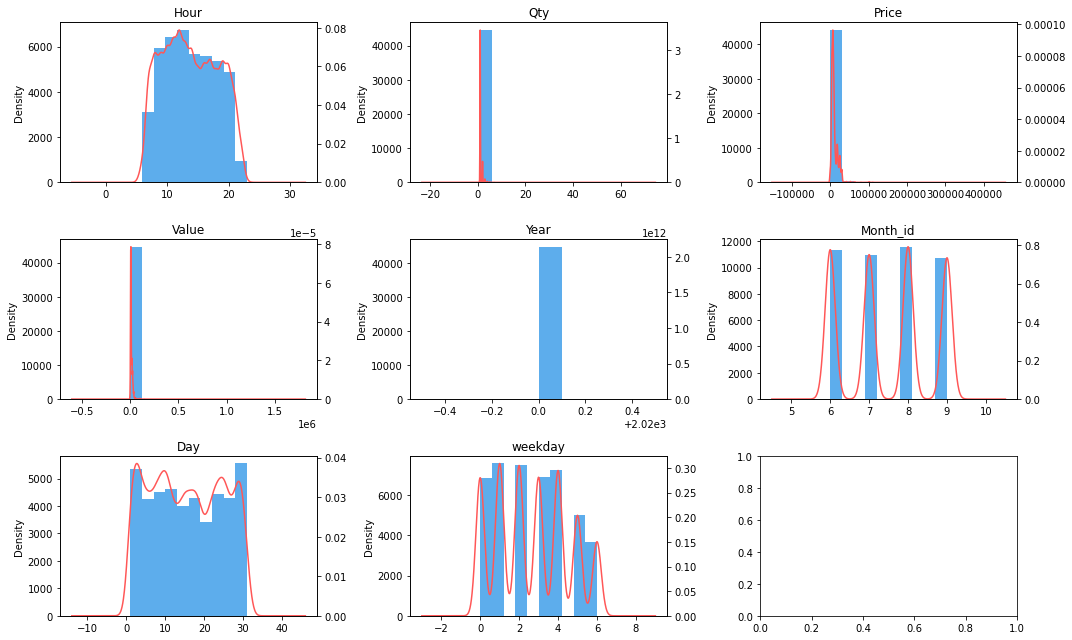

In [30]:
k = len(num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='#5dadec')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='#ff5757')
    ax2.set_ylim(0)

fig.tight_layout()

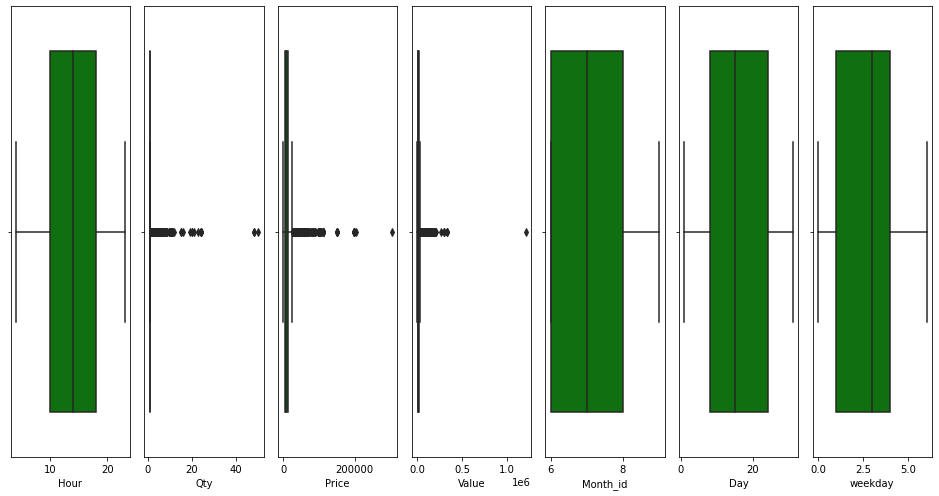

In [31]:
features_boxplot = ['Hour','Qty', 'Price','Value','Month_id','Day','weekday']
plt.figure(figsize=(15,7))
for i in range(0, len(features_boxplot)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(num[features_boxplot[i]],color='green',orient='v')
    plt.tight_layout()

-------

## Analyis Data

In [32]:
## Using wordcloud to known most popular words in dataset

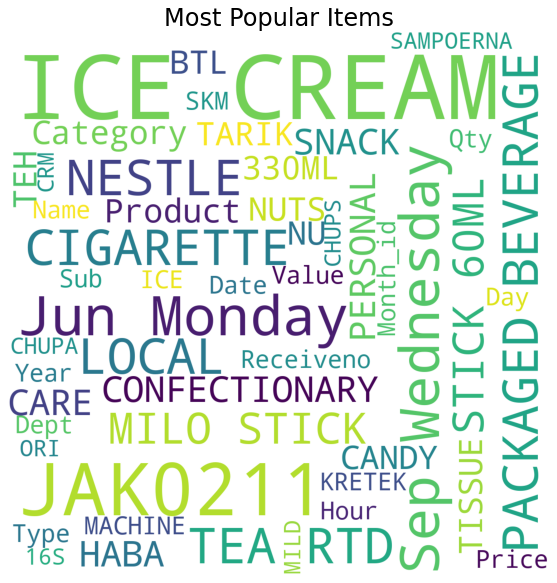

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud,STOPWORDS

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 50,stopwords=STOPWORDS.add("NaN")).generate(str(Market))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 24)
plt.show()

----

### Trends in Quarter-III

-----

-----

#### Performance Quarterly Daily Trend

• Summary Quantity Sales Trendline in Q-x 
- Average sales rev in q-x : Rp  4644424.884297521
- Max sales rev rev in q-x : Rp  10097201
- Min sales rev rev in q-x : Rp  1367800
- Mode sales rev rev in q-x : Rp  1367800
 Total Revenue Sales Rev in Q-x Rp :  561975411
• Summary Quantity Sales Trendline in Q-x 
- quartal x Average qty :  446.26446280991735  pcs 
- quartal x mode qty :  457  pcs 
- quartal x max qty :  912  pcs 
- quartal x min qty :  145  pcs 
 Total Size  sales quantity in Q-x  53998  pcs 


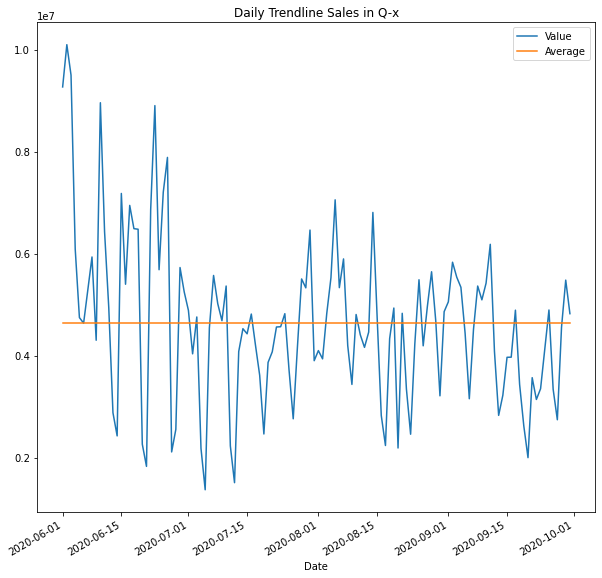

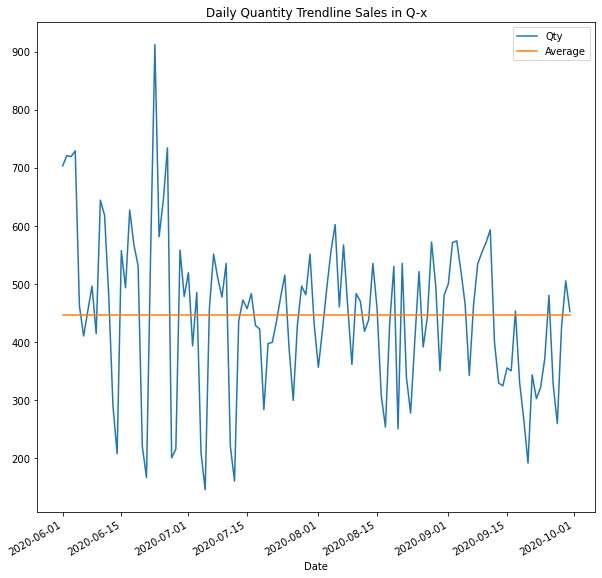

In [34]:
Rev = Market.groupby('Date')['Value'].sum().reset_index()
Rev['Average']= Rev['Value'].mean()
Rev.set_index('Date').plot()
plt.title('Daily Trendline Sales in Q-x')

print('• Summary Quantity Sales Trendline in Q-x ')

print('- Average sales rev in q-x : Rp ', Rev['Value'].mean())
print('- Max sales rev rev in q-x : Rp ', Rev['Value'].max())
print('- Min sales rev rev in q-x : Rp ', Rev['Value'].min())
print('- Mode sales rev rev in q-x : Rp ', Rev['Value'].mode()[0])
#print('Variance sales rev rev in q-x : Rp ', Rev['Value'].Var())

total = Market['Value'].sum()
print(' Total Revenue Sales Rev in Q-x Rp : ',total)

Qty_Qx = Market.groupby('Date')['Qty'].sum().reset_index()
Qty_Qx['Average']= Qty_Qx['Qty'].mean()
Qty_Qx.set_index('Date').plot()

totalqty = Market['Qty'].sum()
totalqty

plt.title('Daily Quantity Trendline Sales in Q-x')
print('• Summary Quantity Sales Trendline in Q-x ')

print('- quartal x Average qty : ', Qty_Qx['Qty'].mean(),' pcs ')
print('- quartal x mode qty : ', Qty_Qx['Qty'].mode()[0],' pcs ')
print('- quartal x max qty : ', Qty_Qx['Qty'].max(),' pcs ')
print('- quartal x min qty : ', Qty_Qx['Qty'].min(),' pcs ')

total = Market['Qty'].sum()
print(' Total Size  sales quantity in Q-x ',total,' pcs ')

**Insight**

*The trend shows that the average product sales for 1 quarter x is Rp 4.644.424, the maximum purchase is Rp 10.097.201. total Sales Revenue in 1 quarter x reached Rp. 561.975.411*

*The total quantity of products sold is 53.998 in Quarter x, The trend shows that the average product qty sells for 1 quarter x is 446,26 pcs , the maximum sells in qty achieve is 912 pcs, sales that are often found are in the range of 457 pieces . total product on sells in  quarter x reached 533,998 Pcs*

----

####  Daily Trend Perfomance

-----

• Summary revenue per hour in Q-x
- Average Sales Q-x Per Hour Rp.  29577653.210526317
- Max Sales Q-x in per hour Rp. 44249902
- Min Sales Q-x in per hour Rp. 6000
- Total : 53998 Pcs
• Summary Sales Quantity per hour in Q-x
- Average Sales Q-x Per Hour 2842.0  pcs 
- Mode Sales qty qty Per Hour :  1  pcs 
- Max Sales Q-x in per hour :  4231  pcs 
- Min Sales Q-x in per hour :  1  pcs 
- Peak Hour: 0    12
dtype: int64 clock|24 hour/day


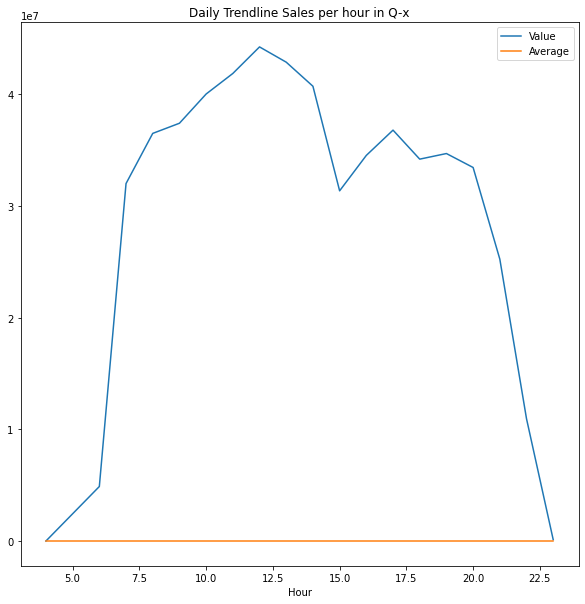

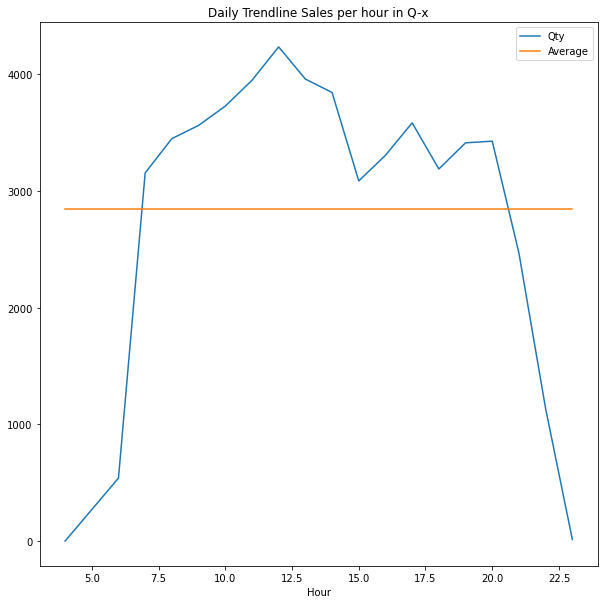

In [35]:
hour_rev = Market.groupby('Hour')['Value'].sum().reset_index()
hour_rev['Average']= hour_rev['Hour'].mean()
hour_rev.set_index('Hour').plot()

plt.title('Daily Trendline Sales per hour in Q-x')

print('• Summary revenue per hour in Q-x')
print('- Average Sales Q-x Per Hour Rp. ', hour_rev['Value'].mean())
print('- Max Sales Q-x in per hour Rp.', hour_rev['Value'].max())
print('- Min Sales Q-x in per hour Rp.', hour_rev['Value'].min())

#total/hour revenue
total_perDay_Sales = Market['Qty'].sum()
print('- Total :', total_perDay_Sales,'Pcs')

hour_qty = Market.groupby('Hour')['Qty'].sum().reset_index()
hour_qty['Average']= hour_qty['Qty'].mean()
hour_qty.set_index('Hour').plot()

plt.title('Daily Trendline Sales per hour in Q-x')

print('• Summary Sales Quantity per hour in Q-x')
print('- Average Sales Q-x Per Hour', hour_qty['Qty'].mean(),' pcs ')
print('- Mode Sales qty qty Per Hour : ', hour_qty['Qty'].mode()[0],' pcs ')
print('- Max Sales Q-x in per hour : ', hour_qty['Qty'].max(),' pcs ')
print('- Min Sales Q-x in per hour : ', hour_qty['Qty'].min(),' pcs ')

#total/hour revenue
total_perDay = Market['Hour'].mode()
print('- Peak Hour:', total_perDay, 'clock|24 hour/day')

----

**weekday trend sales Performance**

• Summary Sales qty Q-x by day
- quartal x Average daily sales by day : Rp 80282201.57142857
- quartal x mode daily sales by day : Rp  41477099
- quartal x max daily sales by day : Rp  98700701
- quartal x min daily sales by day : Rp  41477099
• Summary Sales qty Q-x by day
- quartal x Average daily sales by day : 7714.0  pcs 
- quartal x mode daily sales by day :  4313  pcs 
- quartal x max daily sales by day :  9162  pcs 
- quartal x min daily sales by day :  4313  pcs 


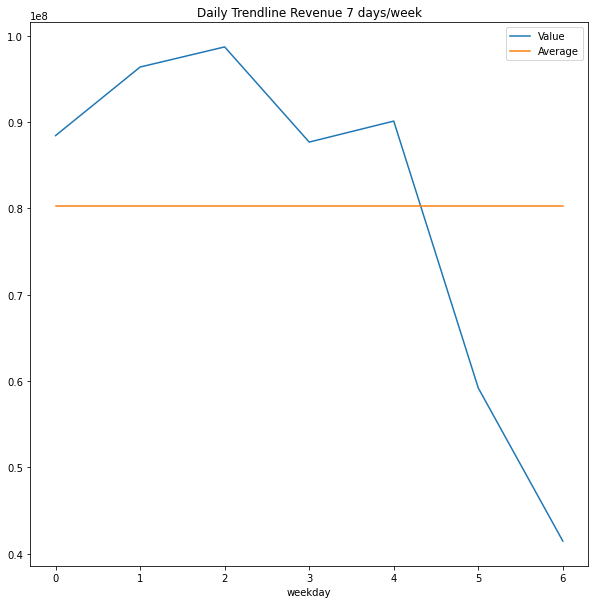

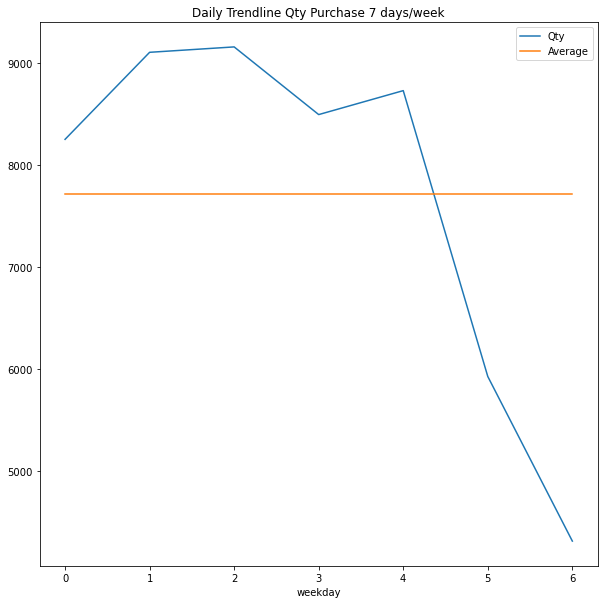

In [36]:
weekdays_reve = Market.groupby('weekday')['Value'].sum().reset_index()
weekdays_reve['Average']= weekdays_reve['Value'].mean()
weekdays_reve.set_index('weekday').plot()

plt.title('Daily Trendline Revenue 7 days/week')

print('• Summary Sales qty Q-x by day')
print('- quartal x Average daily sales by day : Rp', weekdays_reve ['Value'].mean())
print('- quartal x mode daily sales by day : Rp ', weekdays_reve['Value'].mode()[0])
print('- quartal x max daily sales by day : Rp ', weekdays_reve['Value'].max())
print('- quartal x min daily sales by day : Rp ', weekdays_reve['Value'].min())

weekdays_rate = Market.groupby('weekday')['Qty'].sum().reset_index()
weekdays_rate['Average']= weekdays_rate['Qty'].mean()
weekdays_rate.set_index('weekday').plot()

plt.title('Daily Trendline Qty Purchase 7 days/week')

print('• Summary Sales qty Q-x by day')
print('- quartal x Average daily sales by day :', weekdays_rate ['Qty'].mean(),' pcs ')
print('- quartal x mode daily sales by day : ', weekdays_rate['Qty'].mode()[0],' pcs ')
print('- quartal x max daily sales by day : ', weekdays_rate['Qty'].max(),' pcs ')
print('- quartal x min daily sales by day : ', weekdays_rate['Qty'].min(),' pcs ')


Text(0.5, 1.0, 'Weekdays Contribution Sales')

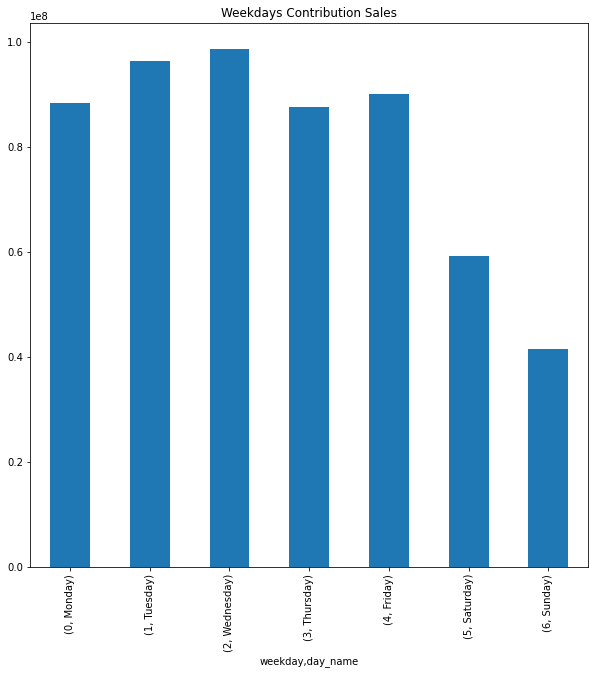

In [37]:
weeklyRev_sum =Market.groupby(['weekday','day_name'])['Value'].sum().plot.bar()
plt.title('Weekdays Contribution Sales')

Text(0.5, 1.0, 'Frequently Sales (Qty)')

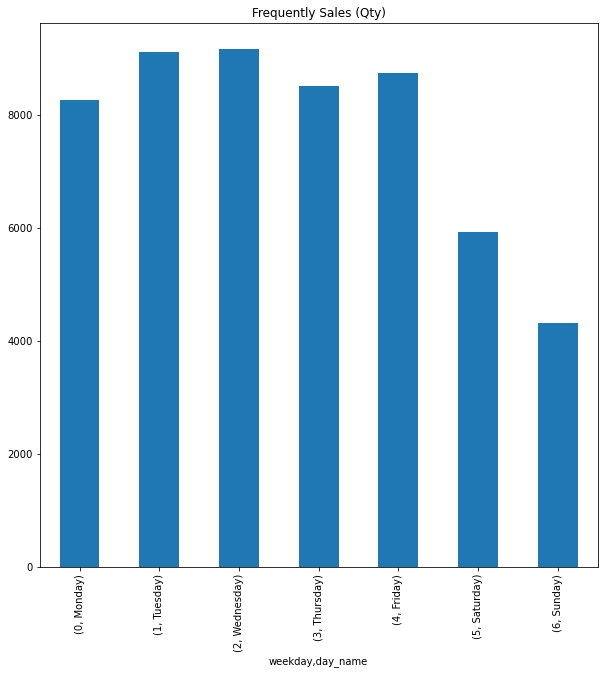

In [38]:
weeklyQty_sum =Market.groupby(['weekday','day_name'])['Qty'].sum().plot.bar()
plt.title('Frequently Sales (Qty)')

***Insight***

*Avg daily sales on Q-x = Rp 80.282.201. Saturday and Sunday (Weekend) had lower rate sales value, in Monday-Friday that graphics represent sales rate value above daily average trendy sales. The data above shows that weekday sales are higher than weekends.Daily purchase days/weeks Revenue got Rp 80.282.201, and in 7 days/week customer spending Rp 41.477.099, maximum customer in 7 days/week is spend Rp 98.700.701 and minimum spending Rp 41.477.099.*

*In Quantity. Purchase Summary in 7 days/week, Average customer buy 7,714 pcs, maximum achieve selling 9,162 pcs and minimum 4313 pcs*

---

#### Performance Month in day

Summary revenue by sales in weekly
- Average sales rev day/month in Q-x Rp :  18128239.06451613
- Mode sales rev day/month  in Q-x Rp : 8760000
- Max sales rev day/month  in Q-x Rp :  24620300
- Min sales rev day/month  Rp  8760000
• Summary  in Qty sales by day in a month 
- quartal x Average daily sales by Monthly : 1741.8709677419354  pcs 
- quartal x mode daily sales by Monthly :  910  pcs 
- quartal x max daily sales by Monthly :  2270  pcs 
- quartal x min daily sales by Monthly :  910  pcs 


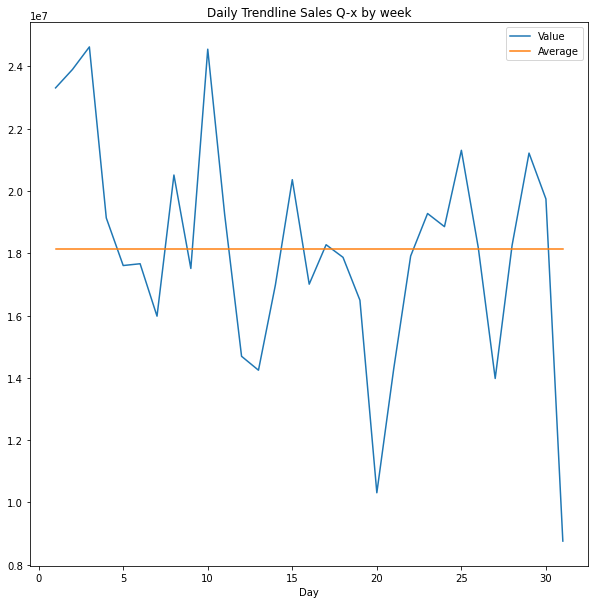

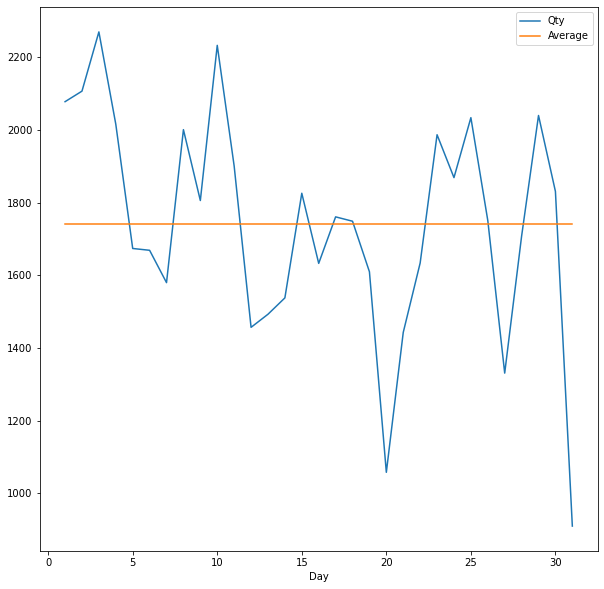

In [39]:
Rev_monthly = Market.groupby('Day')['Value'].sum().reset_index()
Rev_monthly['Average']= Rev_monthly['Value'].mean()
Rev_monthly.set_index('Day').plot()


plt.title('Daily Trendline Sales Q-x by week')

print('Summary revenue by sales in weekly')
print('- Average sales rev day/month in Q-x Rp : ', Rev_monthly['Value'].mean())
print('- Mode sales rev day/month  in Q-x Rp :', Rev_monthly['Value'].mode()[0])
print('- Max sales rev day/month  in Q-x Rp : ', Rev_monthly['Value'].max())
print('- Min sales rev day/month  Rp ', Rev_monthly['Value'].min())

#total monthly revenue
#total_permonth_Sales = Rev_monthly['Value'].sum()
#print('- Total : Rp ', total_permonth_Sales)

Monthday_qty = Market.groupby('Day')['Qty'].sum().reset_index()
Monthday_qty['Average']= Monthday_qty['Qty'].mean()
Monthday_qty.set_index('Day').plot()

print('• Summary  in Qty sales by day in a month ')
print('- quartal x Average daily sales by Monthly :', Monthday_qty ['Qty'].mean(),' pcs ')
print('- quartal x mode daily sales by Monthly : ', Monthday_qty['Qty'].mode()[0],' pcs ')
print('- quartal x max daily sales by Monthly : ', Monthday_qty['Qty'].max(),' pcs ')
print('- quartal x min daily sales by Monthly : ', Monthday_qty['Qty'].min(),' pcs ')

#total/hour revenue
#total_permonth_qty = Monthday_qty['Value'].sum()
#print('- Total : Rp ', total_permonth_qty,'pcs')

***Insight***

*Average daily revenue per month on Q-x Rp 18.128.239, highest revenue achieve in first week in month, achieve Rp 24.620.300, and lowest revenue achieve in last weeek in month, achieve Rp 8.760.000. In purchasing quantity, average purchase per month 1742 pcs. highest purchase occurs on first week, achieving 2270 pcs. and lowest purchase occurs on last week in month, achieve 910 pcs*

----

#### Weekly in performance

Summary revenue by sales in Month in Q-x
- Average sales rev per week in Q-x Rp  31220856.166666668
- Mode sales rev rev per week in Q-x Rp : 14858400
- Max sales rev rev per week in Q-x Rp :  44331404
- Min sales rev rev per week Rp  14858400
Summary revenue by sales in Month in Q-x
- Average sales rev per week :  2999.8888888888887 Pcs
- Mode sales rev rev per week : 1382 Pcs
- Max sales rev rev per week :  3843 Pcs
- Min sales rev rev per week  1382 Pcs


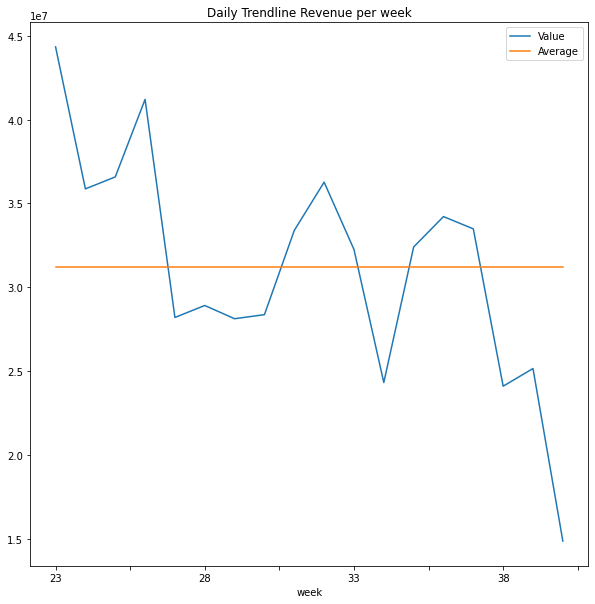

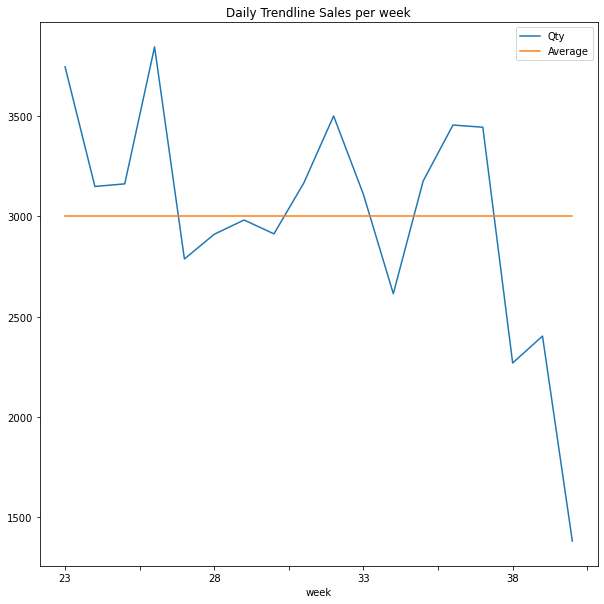

In [40]:
week_rev = Market.groupby('week')['Value'].sum().reset_index()
week_rev['Average']= week_rev['Value'].mean()
week_rev.set_index('week').plot()


plt.title('Daily Trendline Revenue per week')

print('Summary revenue by sales in Month in Q-x')

print('- Average sales rev per week in Q-x Rp ', week_rev['Value'].mean())
print('- Mode sales rev rev per week in Q-x Rp :', week_rev['Value'].mode()[0])
print('- Max sales rev rev per week in Q-x Rp : ', week_rev['Value'].max())
print('- Min sales rev rev per week Rp ', week_rev['Value'].min())

#total/hour revenue
#total_perweek_Sales = week_rev['Value'].sum()
#print('- Total : Rp ', total_perweek_Sales)


weekly_qty = Market.groupby('week')['Qty'].sum().reset_index()
weekly_qty['Average']= weekly_qty['Qty'].mean()
weekly_qty.set_index('week').plot()


plt.title('Daily Trendline Sales per week')

print('Summary revenue by sales in Month in Q-x')

print('- Average sales rev per week : ', weekly_qty['Qty'].mean(),'Pcs')
print('- Mode sales rev rev per week :', weekly_qty['Qty'].mode()[0],'Pcs')
print('- Max sales rev rev per week : ', weekly_qty['Qty'].max(),'Pcs')
print('- Min sales rev rev per week ', weekly_qty['Qty'].min(),'Pcs')

#total in Q-x per week revenue
#total_perweek_qty = weekly_qty['Qty'].sum()
#print('- Total :', total_perweek_qty,'Pcs')

Text(0.5, 1.0, 'per week Contribution Sales Revenue')

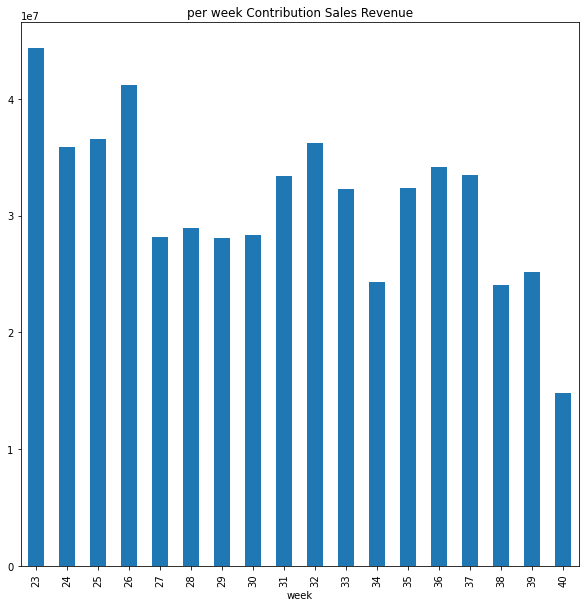

In [41]:
weeklyRev_sum =Market.groupby(['week'])['Value'].sum().plot.bar()
plt.title('per week Contribution Sales Revenue')

Text(0.5, 1.0, 'per week Contribution Sales Purchase')

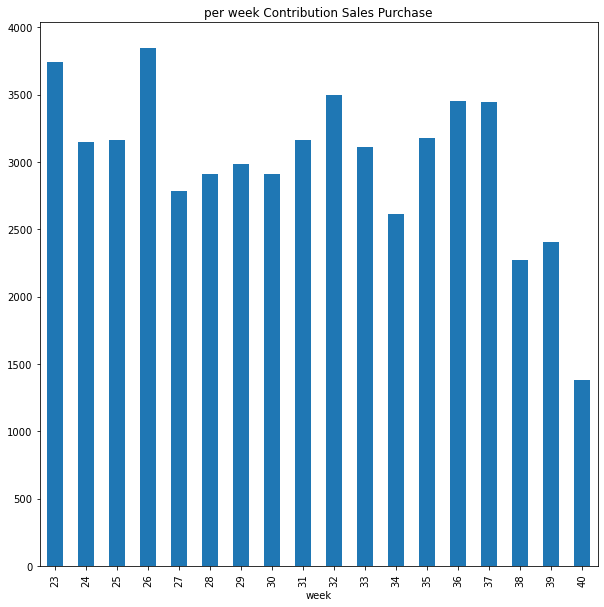

In [42]:
weeklyQty_sum =Market.groupby(['week'])['Qty'].sum().plot.bar()
plt.title('per week Contribution Sales Purchase')

***Insight***

*Average weekly sales Revenue on Q-x is Rp 31.220.856, Highest revenue on week 23 achieve Rp. 44.331.404 and lower Revenue on week 40 achieve Rp 14.858.400. and Average weekly purchase 3000 pcs per week. highest qty purchase on week 26 with 3843 pcs, and lower qty purchase on week 40 with
1382 pcs.*

-----

-----

#### Performance Monthly

Summary sales revenue per Month
- Average sales rev  per Month Rp  140493852.75
- Mode sales rev rev per Month Rp  126935496
- Max sales rev rev per Month Rp  168948008
- Min sales rev rev per Month Rp  126935496
Summary purchase per Month
- Average purchase  per Month: 13499.5 pcs
- Mode purchase per Month:  12471 pcs
- Max purchase per Month:  14932 pcs
- Min purchase per Month:  12471 pcs


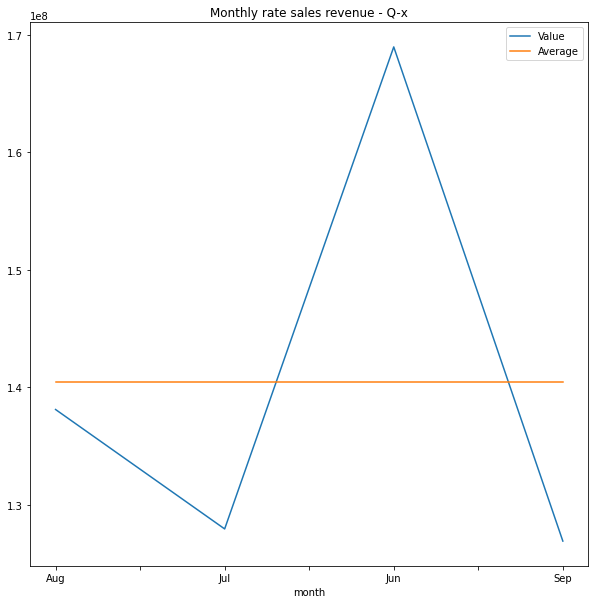

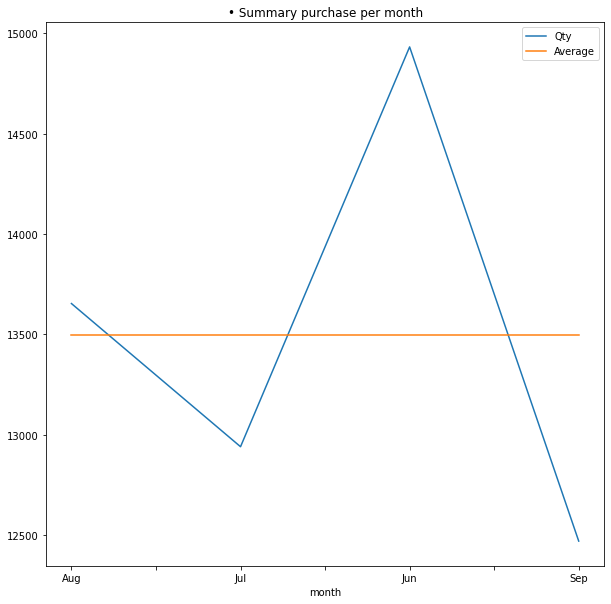

In [43]:
month_rev = Market.groupby('month')['Value'].sum().reset_index()
month_rev['Average']= month_rev['Value'].mean()
month_rev.set_index('month').plot()
plt.title('Monthly rate sales revenue - Q-x')
print('Summary sales revenue per Month')

print('- Average sales rev  per Month Rp ', month_rev['Value'].mean())
print('- Mode sales rev rev per Month Rp ', month_rev['Value'].mode()[0])
print('- Max sales rev rev per Month Rp ', month_rev['Value'].max())
print('- Min sales rev rev per Month Rp ', month_rev['Value'].min())


month_qty = Market.groupby('month')['Qty'].sum().reset_index()
month_qty['Average'] = month_qty['Qty'].mean()
month_qty.set_index('month').plot()

plt.title('• Summary purchase per month')

print('Summary purchase per Month')
print('- Average purchase  per Month:', month_qty['Qty'].mean(),'pcs')
print('- Mode purchase per Month: ', month_qty['Qty'].mode()[0],'pcs')
print('- Max purchase per Month: ', month_qty['Qty'].max(),'pcs')
print('- Min purchase per Month: ', month_qty['Qty'].min(),'pcs')

***Insight***

*Average Monthly sales revenue in Q-x is Rp 140.493.852, highest revenue happen in June achieve Rp 168.948.008 and lowest revenue happen Rp 126.935.496 happen in September. Average Monthly purchase in Q-x is 13.500 pcs, highest purchase happen in june with 14.932 Pcs and lowest purchase happen in September with 12.471 Pcs*

----

-----

In [44]:
Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          44693 non-null  datetime64[ns]
 1   Receiveno     44693 non-null  object        
 2   Hour          44693 non-null  int64         
 3   Dept          44693 non-null  object        
 4   Category      44693 non-null  object        
 5   Sub Category  44693 non-null  object        
 6   Type Product  44693 non-null  object        
 7   Product Name  44693 non-null  object        
 8   Qty           44693 non-null  int64         
 9   Price         44693 non-null  int64         
 10  Value         44693 non-null  int64         
 11  Year          44693 non-null  int64         
 12  Month_id      44693 non-null  int64         
 13  Day           44693 non-null  int64         
 14  week          44693 non-null  object        
 15  month         44693 non-null  object

----

----

-----

----

### Market Cap

-----

In [45]:
Market.head(2)

Date                 Receiveno  Hour           Dept       Category  \
0 2020-06-01  JAK0211.58.20200601.0279    22      CIGARETTE      CIGARETTE   
1 2020-06-01  JAK0211.58.20200601.0074    12  CONFECTIONARY  CONFECTIONARY   

                     Sub Category Type Product             Product Name  Qty  \
0  KRETEK CIGARETTE MACHINE (SKM)    CIGARETTE    SAMPOERNA A MILD  16S    1   
1                           CANDY        CANDY  CHUPA CHUPS ORI ICE CRM    2   

   Price  Value  Year  Month_id  Day week month  weekday day_name  
0  25000  25000  2020         6    1   23   Jun        0   Monday  
1   2500   5000  2020         6    1   23   Jun        0   Monday

In [46]:
Market.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          44693 non-null  datetime64[ns]
 1   Receiveno     44693 non-null  object        
 2   Hour          44693 non-null  int64         
 3   Dept          44693 non-null  object        
 4   Category      44693 non-null  object        
 5   Sub Category  44693 non-null  object        
 6   Type Product  44693 non-null  object        
 7   Product Name  44693 non-null  object        
 8   Qty           44693 non-null  int64         
 9   Price         44693 non-null  int64         
 10  Value         44693 non-null  int64         
 11  Year          44693 non-null  int64         
 12  Month_id      44693 non-null  int64         
 13  Day           44693 non-null  int64         
 14  week          44693 non-null  object        
 15  month         44693 non-null  object

#### Top 5 Departement

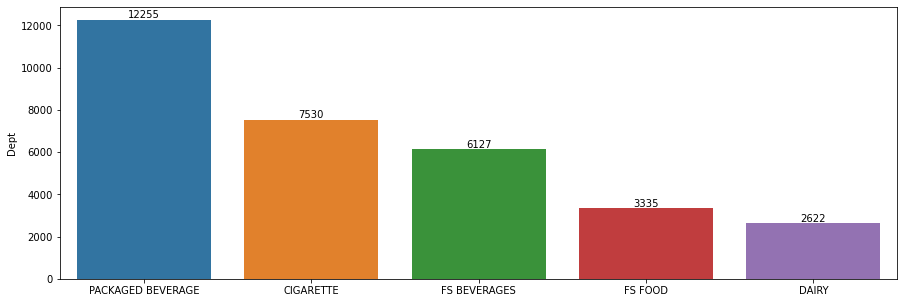

In [47]:
labels= Market['Dept'].value_counts()[:5].keys()
values= Market['Dept'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values, order=Market['Dept'].value_counts().iloc[:5].index)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### Top 5 Category

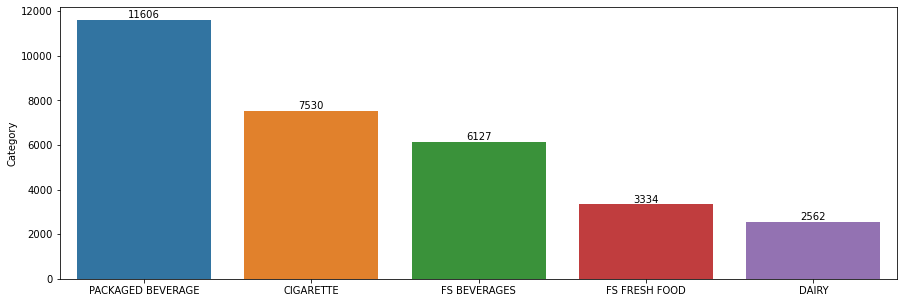

In [48]:
labels= Market['Category'].value_counts()[:5].keys()
values= Market['Category'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values, order=Market['Category'].value_counts().iloc[:5].index)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### Top 5 Sub-Category Product

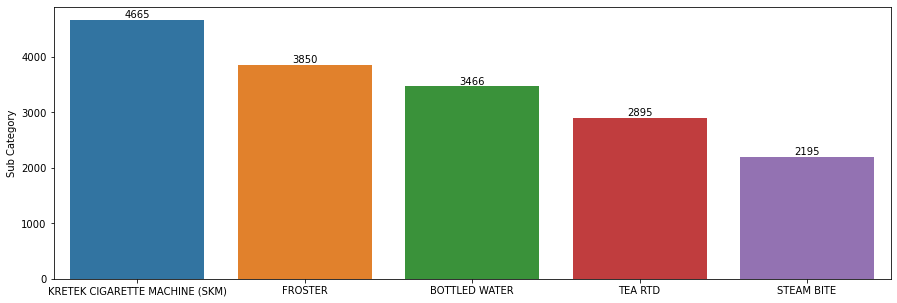

In [49]:
labels= Market['Sub Category'].value_counts()[:5].keys()
values= Market['Sub Category'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values, order=Market['Sub Category'].value_counts().iloc[:5].index)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### Top 5 Type Product

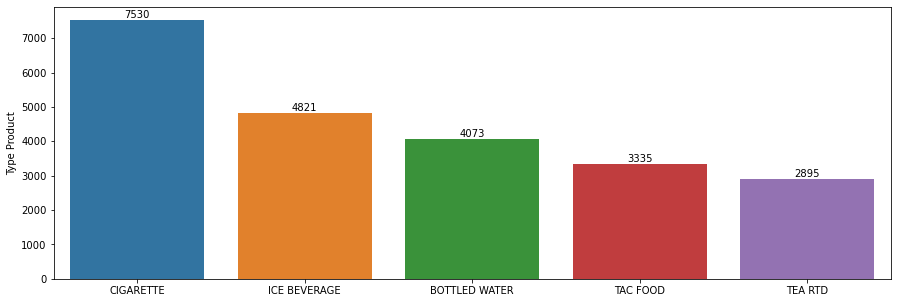

In [50]:
labels= Market['Type Product'].value_counts()[:5].keys()
values= Market['Type Product'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values, order=Market['Type Product'].value_counts().iloc[:5].index)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### Top 5 Product Name

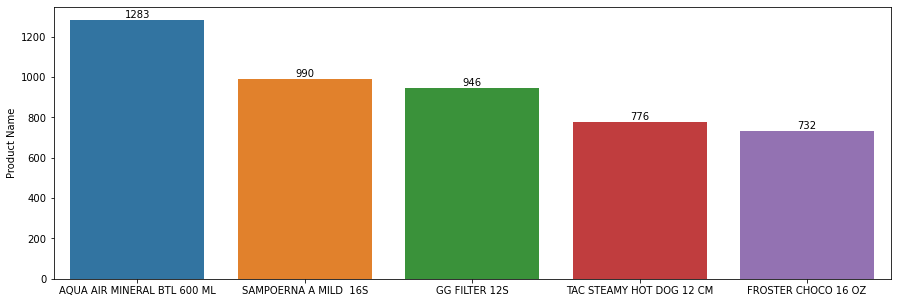

In [51]:
labels= Market['Product Name'].value_counts()[:5].keys()
values= Market['Product Name'].value_counts()[:5]

plt.figure(figsize = (15, 5))
graph = sns.barplot(x = labels, y = values, order=Market['Product Name'].value_counts().iloc[:5].index)

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

***Most Frequent Item***

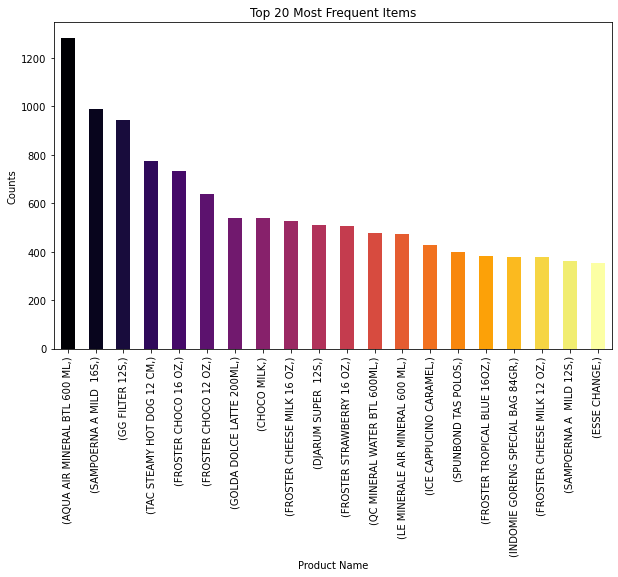

In [52]:
# Most Frequent Items Bar plot

plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
Market[{"Product Name"}].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Product Name')
plt.show()

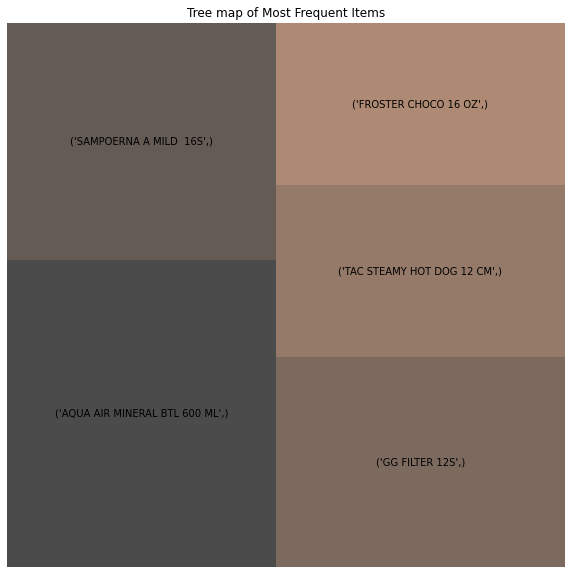

In [53]:
# Tree Map of Most Frequent Items
import squarify
plt.rcParams['figure.figsize']=(10,10)
Items =Market[{"Product Name"}].value_counts().head(5).to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,10))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

---

------

-------

# Machine Learning

### Association Rules &  Apriori Category

In [54]:
# Build Associtation model 
df=Market.loc[Market['Month_id']==9]
trans=df.groupby(['Date','Receiveno','Category','Sub Category'])['Qty',"Value"].sum()

trans2=trans.groupby(['Date','Receiveno','Category','Sub Category']).count()
trans01=trans[['Qty','Value']]
trans01['#sku']=1

transb=trans01.groupby(['Receiveno']).sum()
transb=transb[transb['Qty']>20]
transz=transb

transc=transb.groupby(['#sku']).count()
transd=transb.groupby(['Qty']).sum()

transA=trans2.groupby('Receiveno').count()
transA=transA[['Qty']]
transA.rename(columns={'Qty':'#sku'}, inplace=True)
transB=df.merge(transA, how='left', on ='Receiveno')
transB['Category']=transB['Category'].astype(str)

transF=transB.sort_values('Receiveno')
transG=transB.merge(transF, how="left", on = "Receiveno")

In [55]:
transA=trans2.groupby('Receiveno').count()
transA=transA[['Qty']]
transA.rename(columns={'Qty':'#sku'}, inplace=True)
transB=df.merge(transA, how='left', on ='Receiveno')
transB['Type Product']=transB['Type Product'].astype(str)

In [56]:
transF=transB.sort_values('Receiveno')
transG=transB.merge(transF, how="left", on = "Receiveno")

In [57]:
# Apriori Category
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df01=transG
basket2 = (df01.groupby(['Receiveno', 'Category_x'])['Qty_x']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Receiveno'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_sets = basket2.applymap(encode_units)
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0001)
apriori= rules.loc[ (rules['lift'] >= 1) & 
               (rules['confidence'] >= 0.01) ].sort_values('support', ascending=False).reset_index()
apriori.drop(columns='index', inplace=True)
Category = apriori
Category

antecedents               consequents  antecedent support  \
0                    (SNACK)       (PACKAGED BEVERAGE)            0.080253   
1        (PACKAGED BEVERAGE)                   (SNACK)            0.367457   
2        (PACKAGED BEVERAGE)               (FS BAKERY)            0.367457   
3                (FS BAKERY)       (PACKAGED BEVERAGE)            0.063191   
4             (FS BEVERAGES)           (FS FRESH FOOD)            0.193681   
5            (FS FRESH FOOD)            (FS BEVERAGES)            0.114850   
6                    (SNACK)            (FS BEVERAGES)            0.080253   
7             (FS BEVERAGES)                   (SNACK)            0.193681   
8                    (DAIRY)               (FS BAKERY)            0.091469   
9                (FS BAKERY)                   (DAIRY)            0.063191   
10                   (SNACK)           (CONFECTIONARY)            0.080253   
11           (CONFECTIONARY)                   (SNACK)            0.057188   
12                   (SNACK)                   (DAIRY)            0.080253   
13                   (DAIRY)                   (SNACK)            0.091469   
14  (PL SMOKING ACCESSORIES)               (CIGARETTE)            0.011374   
15               (CIGARETTE)  (PL SMOKING ACCESSORIES)            0.243918   
16           (CONFECTIONARY)                   (DAIRY)            0.057188   
17                   (DAIRY)           (CONFECTIONARY)            0.091469   
18              (GENERAL MD)           (FS FRESH FOOD)            0.052607   
19           (FS FRESH FOOD)              (GENERAL MD)            0.114850   
20              (GENERAL MD)                   (SNACK)            0.052607   
21                   (SNACK)              (GENERAL MD)            0.080253   
22               (ICE CREAM)                   (SNACK)            0.048499   
23                   (SNACK)               (ICE CREAM)            0.080253   
24                   (SNACK)               (FS BAKERY)            0.080253   
25               (FS BAKERY)                   (SNACK)            0.063191   
26                   (DAIRY)              (GENERAL MD)            0.091469   
27              (GENERAL MD)                   (DAIRY)            0.052607   
28       (PACKAGED BEVERAGE)  (PL SMOKING ACCESSORIES)            0.367457   
29  (PL SMOKING ACCESSORIES)       (PACKAGED BEVERAGE)            0.011374   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.367457  0.033807    0.421260  1.146421  0.004318    1.092966  
1             0.080253  0.033807    0.092003  1.146421  0.004318    1.012941  
2             0.063191  0.024961    0.067928  1.074957  0.001741    1.005082  
3             0.367457  0.024961    0.395000  1.074957  0.001741    1.045526  
4             0.114850  0.022907    0.118271  1.029786  0.000663    1.003880  
5             0.193681  0.022907    0.199450  1.029786  0.000663    1.007206  
6             0.193681  0.017694    0.220472  1.138328  0.002150    1.034369  
7             0.080253  0.017694    0.091354  1.138328  0.002150    1.012217  
8             0.063191  0.010269    0.112263  1.776554  0.004489    1.055277  
9             0.091469  0.010269    0.162500  1.776554  0.004489    1.084813  
10            0.057188  0.009005    0.112205  1.962033  0.004415    1.061970  
11            0.080253  0.009005    0.157459  1.962033  0.004415    1.091634  
12            0.091469  0.009005    0.112205  1.226694  0.001664    1.023356  
13            0.080253  0.009005    0.098446  1.226694  0.001664    1.020179  
14            0.243918  0.006793    0.597222  2.448456  0.004019    1.877169  
15            0.011374  0.006793    0.027850  2.448456  0.004019    1.016947  
16            0.091469  0.006793    0.118785  1.298629  0.001562    1.030997  
17            0.057188  0.006793    0.074266  1.298629  0.001562    1.018448  
18            0.114850  0.006635    0.126126  1.098182  0.000593    1.012904  
19            0.05

#### Visualy Output

Text(0.5, 1.0, 'Contribution Category')

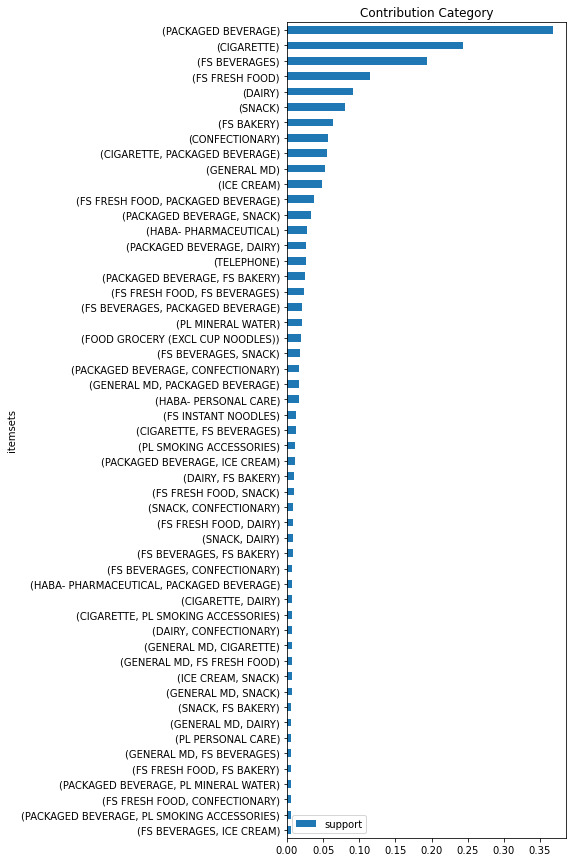

In [58]:
# Top Category
a=frequent_itemsets.sort_values('support',ascending=True)
a.plot.barh(x='itemsets',figsize=(5, 15))
plt.title('Contribution Category')

Estimated number of clusters: 7
Estimated number of noise points: 10
Homogeneity: 0.680
Completeness: 0.402
V-measure: 0.505
Adjusted Rand Index: 0.210
Adjusted Mutual Information: 0.378
Silhouette Coefficient: 0.233


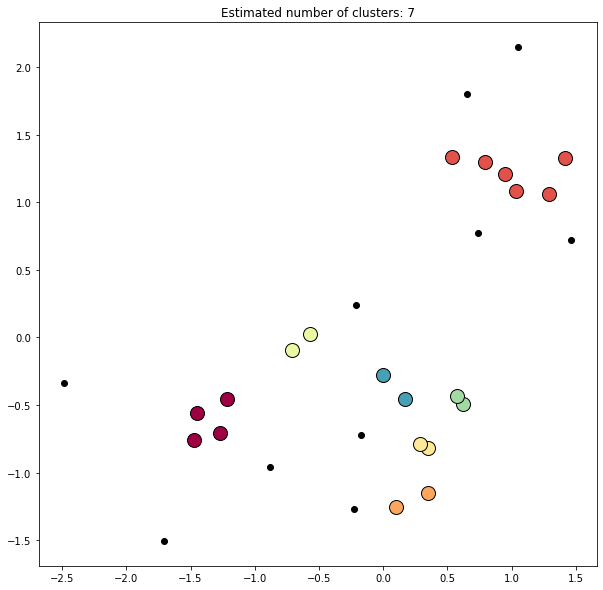

In [61]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
a, labels_true = make_blobs(
    n_samples=30, centers=centers, cluster_std=0.5, random_state=0
)

a = StandardScaler().fit_transform(a)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=2).fit(a)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(a, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = a[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = a[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

-------

***Radar Plot***

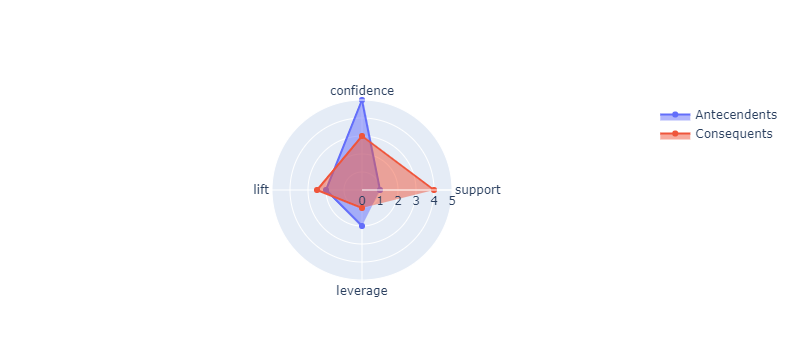

In [62]:
import plotly.graph_objects as go

categories = ['support','confidence','lift','leverage']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 5, 2, 2, 3], #0.01,0.1,1.0,0.001
      theta=categories,
      fill='toself',
      name='Antecendents'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5, 1, 2], #0.01,0.1,1.0,0.001
      theta=categories,
      fill='toself',
      name='Consequents'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

-------

-------

-------

# Combination product

In [66]:
dfa=df01.loc[df01['#sku_y']==2]

dfa1=dfa[dfa['Receiveno'].duplicated(keep=False)]
dfa1['grouped']=dfa1.groupby('Receiveno')['Type Product_x'].transform(lambda x:','.join(x))
dfa1=dfa1[['Receiveno','grouped']].drop_duplicates()

In [67]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in dfa1['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common (10):
    print(key,value)

('ICE BEVERAGE', 'ICE BEVERAGE') 1824
('TAC FOOD', 'TAC FOOD') 904
('CIGARETTE', 'CIGARETTE') 752
('TAC FOOD', 'ICE BEVERAGE') 679
('BOTTLED WATER', 'BOTTLED WATER') 563
('TEA RTD', 'TEA RTD') 552
('BAKERY', 'BAKERY') 513
('CHIPS', 'CHIPS') 510
('ICE BEVERAGE', 'TAC FOOD') 399
('ICE CREAM', 'ICE CREAM') 349


In [68]:
# Combination transaction with 2 product per transaction
dfa=df01.loc[df01['#sku_y']==2]

dfa1=dfa[dfa['Receiveno'].duplicated(keep=False)]
dfa1=dfa1.groupby(['Receiveno','Product Name_x'])['Qty_x'].sum().reset_index()
dfa1['grouped']=dfa1.groupby('Receiveno')['Product Name_x'].transform(lambda x:','.join(x))
dfa1=dfa1[['Receiveno','grouped']].drop_duplicates()

In [69]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in dfa1['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common (10):
    print(key,value)

('FROSTER CHEESE MILK 16 OZ', 'FROSTER CHOCO 16 OZ') 16
('GOLDA DOLCE LATTE 200ML', 'LITE&BITE CHOCO-CHESEE') 13
('FROSTER CHOCO 16 OZ', 'FROSTER STRAWBERRY 16 OZ') 13
('FROSTER STRAWBERRY 16 OZ', 'FROSTER TROPICAL BLUE 16OZ') 12
('FROSTER CHOCO 16 OZ', 'FROSTER TROPICAL BLUE 16OZ') 12
('FROSTER STRAWBERRY 16 OZ', 'TAC STEAMY HOT DOG 12 CM') 7
('FROSTER CHOCO 16 OZ', 'TAC STEAMY HOT DOG 12 CM') 5
('FROSTER CHOCO 16 OZ', 'SAMPOERNA A MILD  16S') 5
('5 DAYS CROISSANT PEANUT BUTTER', 'GOLDA DOLCE LATTE 200ML') 5
('DJI SAM SOE MAGNUM MILD16', 'NU MILK TEA BTL 330 ML') 4


In [70]:
# Combination transaction with 2 product per transaction

dfa=df01.loc[df01['#sku_y']==2]

dfa1=dfa[dfa['Receiveno'].duplicated(keep=False)]
dfa1=dfa1.groupby(['Receiveno','Type Product_x'])['Qty_x'].sum().reset_index()
dfa1['grouped']=dfa1.groupby('Receiveno')['Type Product_x'].transform(lambda x:','.join(x))
dfa1=dfa1[['Receiveno','grouped']].drop_duplicates()

In [71]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in dfa1['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common (10):
    print(key,value)

('ICE BEVERAGE', 'TAC FOOD') 69
('CIGARETTE', 'COFFEE RTD') 54
('BOTTLED WATER', 'CIGARETTE') 46
('TAC FOOD', 'TEA RTD') 43
('CIGARETTE', 'TEA RTD') 40
('BOTTLED WATER', 'TAC FOOD') 40
('BAKERY', 'COFFEE RTD') 34
('CHIPS', 'ICE BEVERAGE') 33
('BOTTLED WATER', 'TEA RTD') 26
('CIGARETTE', 'ICE BEVERAGE') 26


------

------

------

------

------